<a href="https://colab.research.google.com/github/leoxiang66/research-trends-analysis/blob/experiments/experiments/clustering_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install TrendFlow
!pip install ml_leoxiang66==0.6.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16

In [2]:
!git lfs install
!git clone https://huggingface.co/datasets/Adapting/Abstracts-for-Clustering

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'Abstracts-for-Clustering'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), 79.71 KiB | 3.07 MiB/s, done.


In [3]:
import pandas as pd

In [4]:
cv_df = pd.read_csv('/content/Abstracts-for-Clustering/CV abstracts.csv')
nlp_df = pd.read_csv('/content/Abstracts-for-Clustering/NLP abstracts.csv')
audio_df = pd.read_csv('/content/Abstracts-for-Clustering/audio abstracts.csv')

In [5]:
cv_df

,0
0,Humans can easily imagine the complete 3D geom...
1,Single object tracking is a well-known and cha...
2,Cracks play a crucial role in assessing the sa...
3,Fine-grained anomaly detection has recently be...
4,Synthetic image generation has opened up new o...
...,...
87,Current Deep Network (DN) visualization and in...
88,"Visibility underwater is challenging, and degr..."
89,Malignant mesothelioma is classified into thre...
90,Omnidirectional image quality assessment (OIQA...


In [6]:
cv_df['label'] = 0
cv_df


,0,label
0,Humans can easily imagine the complete 3D geom...,0
1,Single object tracking is a well-known and cha...,0
2,Cracks play a crucial role in assessing the sa...,0
3,Fine-grained anomaly detection has recently be...,0
4,Synthetic image generation has opened up new o...,0
...,...,...
87,Current Deep Network (DN) visualization and in...,0
88,"Visibility underwater is challenging, and degr...",0
89,Malignant mesothelioma is classified into thre...,0
90,Omnidirectional image quality assessment (OIQA...,0


In [7]:
nlp_df['label'] = 1
nlp_df

,0,label
0,This paper describes our participation in SemE...,1
1,Clinical prediction is an essential task in th...,1
2,Knowledge graphs (KGs) have received increasin...,1
3,Transformer-based pre-trained models have achi...,1
4,"Large language models (LLMs), such as ChatGPT,...",1
...,...,...
62,The widespread availability of internet access...,1
63,"Current captioning datasets, focus on object-c...",1
64,"In this paper, we summarize the current state ...",1
65,The multi-sentential long sequence textual dat...,1


In [8]:
audio_df['label'] = 2
audio_df

,0,label
0,"We present ProsAudit, a benchmark in English t...",2
1,The increasing reliability of automatic speech...,2
2,Deep neural network based speech enhancement t...,2
3,Deep neural network based speech enhancement a...,2
4,Monaural speech enhancement has been widely st...,2
5,Transformer based models have provided signifi...,2
6,"In this work, we propose a frequency bin-wise ...",2
7,"In this study, we present an approach to train...",2
8,Speech utterances recorded under differing con...,2
9,"In this work, we propose a frequency bin-wise ...",2


In [9]:
all_df = pd.concat([cv_df, nlp_df, audio_df], ignore_index=True)
# all_df = all_df.sample(frac=1, ignore_index=True)

In [10]:
all_df

,0,label
0,Humans can easily imagine the complete 3D geom...,0
1,Single object tracking is a well-known and cha...,0
2,Cracks play a crucial role in assessing the sa...,0
3,Fine-grained anomaly detection has recently be...,0
4,Synthetic image generation has opened up new o...,0
...,...,...
213,End-to-end automatic speech recognition (ASR) ...,2
214,We previously proposed contextual spelling cor...,2
215,Orcinus orca (killer whales) exhibit complex c...,2
216,Speaker diarization is a task to label an audi...,2


In [11]:
texts = list(all_df['0'])
texts

['Humans can easily imagine the complete 3D geometry of occluded objects and scenes. This appealing ability is vital for recognition and understanding. To enable such capability in AI systems, we propose VoxFormer, a Transformer-based semantic scene completion framework that can output complete 3D volumetric semantics from only 2D images. Our framework adopts a two-stage design where we start from a sparse set of visible and occupied voxel queries from depth estimation, followed by a densification stage that generates dense 3D voxels from the sparse ones. A key idea of this design is that the visual features on 2D images correspond only to the visible scene structures rather than the occluded or empty spaces. Therefore, starting with the featurization and prediction of the visible structures is more reliable. Once we obtain the set of sparse queries, we apply a masked autoencoder design to propagate the information to all the voxels by self-attention. Experiments on SemanticKITTI show 

In [12]:
from trendflow.lrt.clustering import ClusterPipeline, Configuration,BaselineConfig

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [13]:
baseline = BaselineConfig()

config1 = Configuration('all-mpnet-base-v2','pca','kmeans-euclidean','keyphrase-transformer')

config2 = Configuration('all-mpnet-base-v2', 'none', 'gmm', 'keyphrase-transformer')

config3 = Configuration('all-mpnet-base-v2', 'pca', 'gmm', 'keyphrase-transformer')

configs = [
    baseline,
    config1,
    config2,
    config3
    
]

In [14]:
from sklearn.decomposition import PCA

def compute_center(texts,cluster_pipe,n_components):
    center = cluster_pipe.__1_generate_word_embeddings__(texts)
    # center = cluster_pipe.__2_dimenstion_reduction__(center, n_components)
    if cluster_pipe.dimension_reduction is not None:
      pca = PCA(n_components,svd_solver='randomized')
      center = pca.fit_transform(center)
    center = np.mean(center, axis = 0)
    return center

In [15]:
from unsupervised_learning.clustering import GaussianMixture, Silhouette, compute_clustering_accuracy
import numpy as np

accuracies = []
for config in configs:
  print(config)
  cluster_pipe = ClusterPipeline(config)

  x = cluster_pipe.__1_generate_word_embeddings__(texts)
  x = cluster_pipe.__2_dimenstion_reduction__(x)
  print(x.shape)
 

  cv_center = np.mean(x[:92],axis=0)
  nlp_center = np.mean(x[92:159],axis = 0)
  audio_center = np.mean(x[159:218], axis=0)

  gold_centers = np.array([cv_center,nlp_center,audio_center])

  

  
  best_k_algo = Silhouette(GaussianMixture,2,10)
  best_k = best_k_algo.get_best_k(x)

  labels, cluster_centers = cluster_pipe.clustering(x, k=best_k)

  accuracy = compute_clustering_accuracy(
      gold_labels = list(all_df['label']),
      gold_centers = gold_centers,
      clustered_labels = labels,
      cluster_centers = cluster_centers
      )

  accuracies.append(accuracy)

>>> start generating word embeddings...
>>> successfully generated word embeddings...
(218, 768)
>>> start generating word embeddings...
>>> successfully generated word embeddings...
>>> start dimension reduction...
>>> The reduced dimension is 111.
>>> finished dimension reduction...
(218, 111)
>>> start generating word embeddings...
>>> successfully generated word embeddings...
(218, 768)
>>> start generating word embeddings...
>>> successfully generated word embeddings...
>>> start dimension reduction...
>>> The reduced dimension is 111.
>>> finished dimension reduction...
(218, 111)


In [16]:
print(accuracies)

[0.8853211009174312, 0.8853211009174312, 0.8944954128440367, 0.8899082568807339]


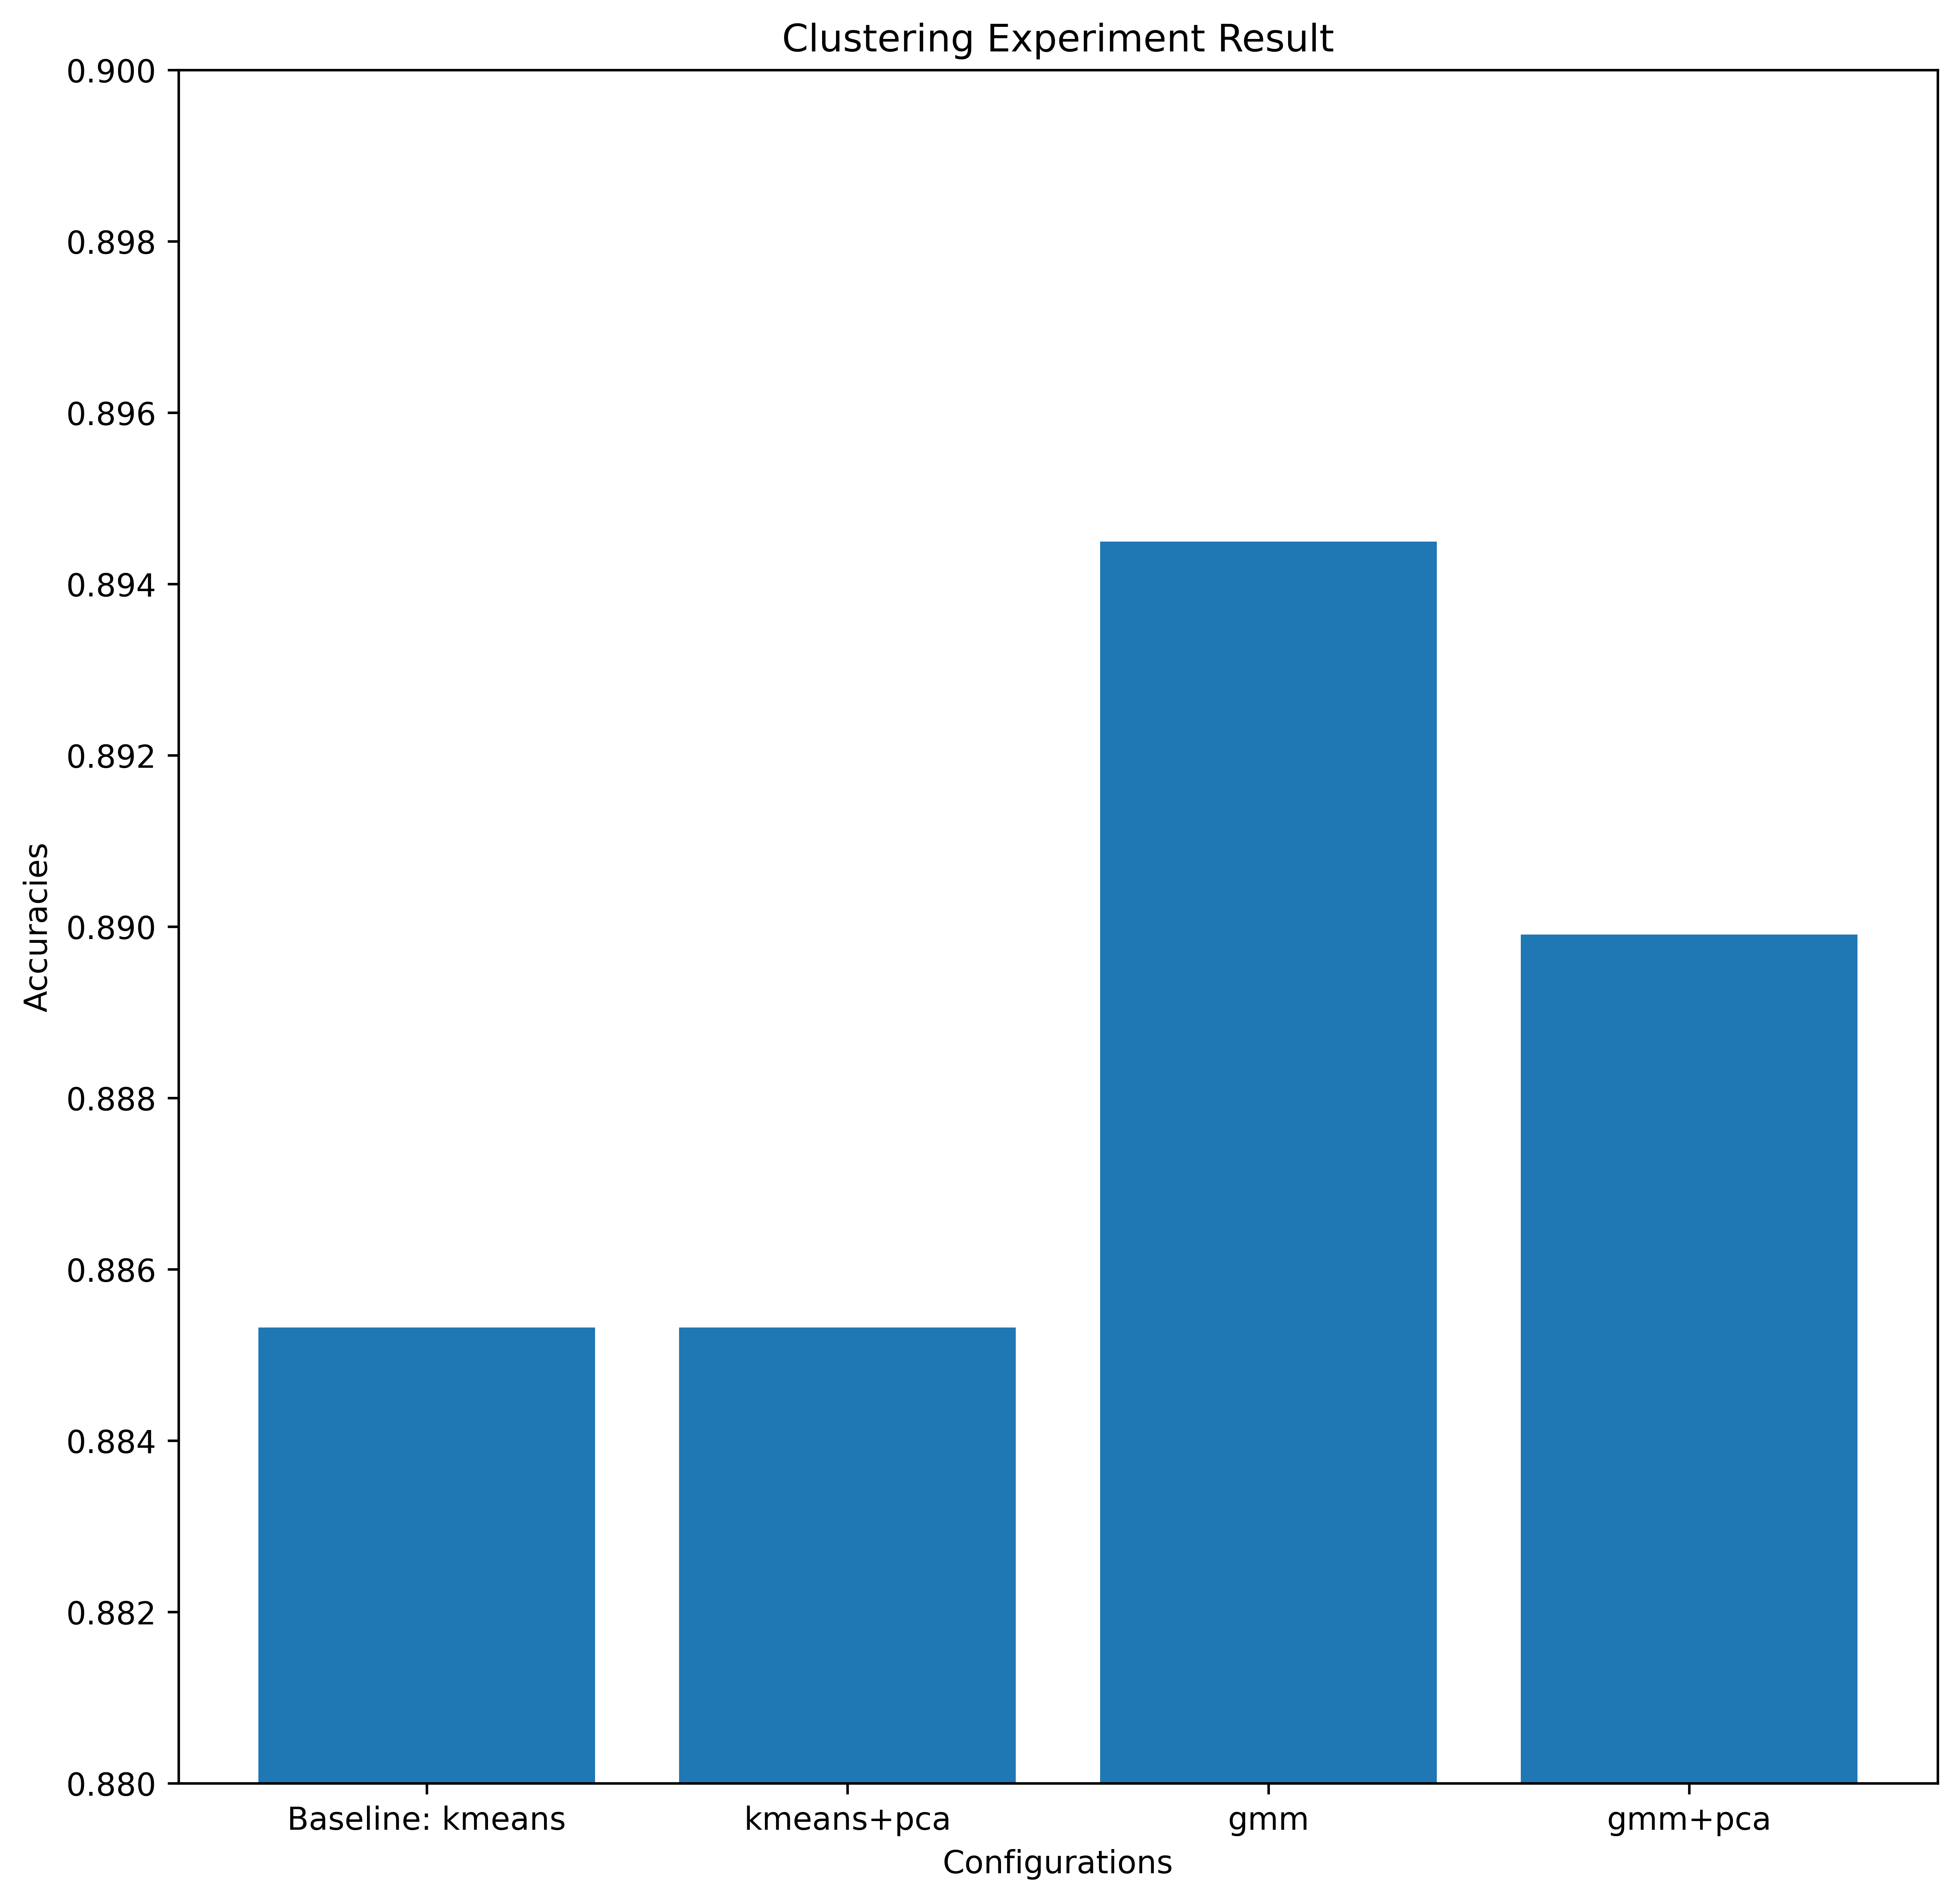

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(10,10),dpi=600)

# 数据
labels = ['Baseline: kmeans', 'kmeans+pca', 'gmm', 'gmm+pca']
values = accuracies

# 绘制柱状图
plt.bar(labels, values)

# 设置标题和坐标轴标签
plt.title('Clustering Experiment Result')
plt.xlabel('Configurations')
plt.ylabel('Accuracies')


y_major_locator=MultipleLocator(0.002) 

ax=plt.gca() #ax为两条坐标轴的实例
ax.yaxis.set_major_locator(y_major_locator) #把y轴的主刻度设置为10的倍数

plt.ylim(0.88,0.9) # 设置y轴范围

# 显示图形
plt.show()